# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [1]:
import pandas as pd 
import numpy as np  


## Load the Data

In [2]:
df = pd.read_csv('Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [4]:
df.shape

(52000, 26)

In [5]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
      dtype='object')

In [6]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [7]:
df.isnull().sum()

Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                               322
Number_of_Vehicles                                0
Number_of_Casualties                           1041
Date                                              0
Day_of_Week                                       0
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
2nd_Road_Class                                    0
2nd_Road_Number                                   0
Pedestrian_Crossing-Human_Control                 0
Pedestrian_C

In [8]:
df['Urban_or_Rural_Area'].dtype

dtype('float64')

In [9]:
df['Light_Conditions'].dtype

dtype('O')

In [10]:
df['Number_of_Casualties'].dtype


dtype('float64')

In [11]:
df['Accident_Severity'].dtype

dtype('float64')

In [12]:
#duplicate
df.duplicated().sum()

43

In [13]:
df= df.drop_duplicates(subset= df, keep='last')

In [14]:
df.duplicated().sum()

0

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [ ]:
#remove outlires


In [15]:
#imputer missing valuse for numeric colums
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

null_cols =df[['Urban_or_Rural_Area', 'Number_of_Casualties','Accident_Severity']]
null_cols = null_cols.select_dtypes(include=np.number)
imp.fit(null_cols)
null_cols=imp.transform(null_cols)

In [16]:
null_cols

array([[2., 1., 3.],
       [1., 1., 3.],
       [1., 1., 3.],
       ...,
       [1., 1., 3.],
       [1., 2., 3.],
       [2., 1., 3.]])

In [17]:
null_cols= pd.DataFrame()

In [18]:
df= df.drop(['Urban_or_Rural_Area',	'Number_of_Casualties', 'Accident_Severity'], axis=1)
pd.concat([df, null_cols])

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Date,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),...,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,1,27/11/2009,6,556,E10000011,...,70,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,2,10/10/2010,1,26,E09000017,...,30,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,2,14/09/2005,4,746,W06000014,...,30,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,1,18/08/2007,7,84,E10000017,...,30,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,2,06/08/2013,3,257,E06000021,...,30,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Yes,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,475125.0,319380.0,-0.888006,52.766777,33,2,31/08/2012,6,365,E10000018,...,30,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,Yes,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,1,08/05/2013,4,502,E10000014,...,60,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,Yes,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3,01/11/2011,3,516,E10000030,...,40,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,Yes,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,2,22/07/2011,6,323,E06000015,...,30,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,Yes,2011


In [19]:
# for non numeric colum 'Weather_Conditions" , 'Light_Conditions'
df['Weather_Conditions'].fillna(df['Weather_Conditions'].mode()[0], inplace=True)

df['Light_Conditions'].fillna(df['Light_Conditions'].mode()[0], inplace=True)

C:\Users\rahaf\AppData\Local\Temp\ipykernel_22640\579830392.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weather_Conditions'].fillna(df['Weather_Conditions'].mode()[0], inplace=True)
C:\Users\rahaf\AppData\Local\Temp\ipykernel_22640\579830392.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [20]:
df.isnull().sum()

Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Number_of_Vehicles                             0
Date                                           0
Day_of_Week                                    0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditi

In [21]:
#scale the data
from sklearn.preprocessing import StandardScaler

string_cols = df.select_dtypes(include='object').columns
numeric_df = df.drop(string_cols, axis=1)
scaler = StandardScaler()
scaler.fit(numeric_df)

StandardScaler()

In [23]:
df.select_dtypes(include='float64').dtypes

Location_Easting_OSGR     float64
Location_Northing_OSGR    float64
Longitude                 float64
Latitude                  float64
dtype: object

In [24]:
df.select_dtypes(include='int64').dtypes

Police_Force                  int64
Number_of_Vehicles            int64
Day_of_Week                   int64
Local_Authority_(District)    int64
1st_Road_Class                int64
1st_Road_Number               int64
Speed_limit                   int64
2nd_Road_Class                int64
2nd_Road_Number               int64
Year                          int64
dtype: object

In [78]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()
df['Weather_Conditions'] = label_encoder.fit_transform(df['Weather_Conditions'])
df['Road_Surface_Conditions'] = label_encoder.fit_transform(df['Road_Surface_Conditions'])
df['Pedestrian_Crossing-Physical_Facilities'] = label_encoder.fit_transform(df['Pedestrian_Crossing-Physical_Facilities'])

scaler = StandardScaler()
#object_col = df[[ 'Pedestrian_Crossing-Physical_Facilities', 
                 #   'Pedestrian_Crossing-Human_Control', 'Road_Type', 'Local_Authority_(Highway)', 'Light_Conditions',
                 #   'Weather_Conditions', 'Road_Surface_Conditions']]
#scaler.fit(object_col)

In [105]:
# PCA
# 2nd try 
from sklearn.impute import SimpleImputer

from sklearn.decomposition import PCA



df_mean = df[['Location_Easting_OSGR', 'Location_Northing_OSGR','Longitude', 'Latitude', 'Police_Force', 'Number_of_Vehicles', 
              'Day_of_Week' , 'Local_Authority_(District)' , '1st_Road_Class' , '1st_Road_Number' , 'Speed_limit']]

imputer = SimpleImputer(strategy='mean')
numeric_cols = df.select_dtypes(include=np.number)
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(numeric_cols), columns=numeric_cols.columns)
df_imputed = pd.concat([df_imputed, df.select_dtypes(exclude=np.number)], axis=1)


imputer = SimpleImputer(strategy='mean')
numeric_cols = df.select_dtypes(include=np.number)
imputer.fit(numeric_cols)
Z_imputed = imputer.transform(df_imputed[numeric_cols.columns])



n_components= 2
pca = PCA(n_components=2)
df_std = df.select_dtypes(include=np.number).std()
pca.fit(Z_imputed)
x_pca = pca.transform(Z_imputed)

#Z_imputed = imputer.transform(df_imputed)
Z = (df_imputed - df_mean) / df_std 
x_pca = pca.transform(Z_imputed)


#Z_imputed = imputer.fit_transform(Z)
#Z = (df - df_imputed) / df_std 
#Z = (numeric_cols - df_imputed) / df_std
#x_pca = pca.transform(df_imputed)

df_pca1 = pd.DataFrame(x_pca, columns=['PC{}'.format(i+1) for i in range(n_components)])

In [101]:
# PCA
# first try 
from sklearn.decomposition import PCA



df_mean = df[['Location_Easting_OSGR', 'Location_Northing_OSGR','Longitude', 'Latitude', 'Police_Force', 'Number_of_Vehicles', 
              'Day_of_Week' , 'Local_Authority_(District)' , '1st_Road_Class' , '1st_Road_Number' , 'Speed_limit',
              '2nd_Road_Class', '2nd_Road_Number' ]].mean()
df_std = df[['Weather_Conditions', 'Road_Surface_Conditions']].std()
Z = (df - df_mean) / df_std 

n_components= 2
pca = PCA(n_components=2)
pca.fit(Z)
x_pca = pca.transform(Z)


df_pca1 = pd.DataFrame(x_pca, columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])
print(df_pca1)

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
df.select_dtypes(include='object').dtypes

Date                                           object
Local_Authority_(Highway)                      object
Road_Type                                      object
Pedestrian_Crossing-Human_Control              object
Pedestrian_Crossing-Physical_Facilities        object
Light_Conditions                               object
Weather_Conditions                             object
Road_Surface_Conditions                        object
Did_Police_Officer_Attend_Scene_of_Accident    object
dtype: object

In [ ]:
# One hot 
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
# 9 columns
category_cols = df[['Did_Police_Officer_Attend_Scene_of_Accident', 'Pedestrian_Crossing-Physical_Facilities', 
                    'Pedestrian_Crossing-Human_Control', 'Road_Type', 'Local_Authority_(Highway)', 'Date', 'Light_Conditions',
                    'Weather_Conditions', 'Road_Surface_Conditions']]
ohe.fit(category_cols)

OneHotEncoder()

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [42]:
df['geographical location']= df['Location_Easting_OSGR'] + df['Location_Northing_OSGR']

df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Date,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Did_Police_Officer_Attend_Scene_of_Accident,Year,geographical location
0,560530.0,103950.0,0.277298,50.812789,47,1,27/11/2009,6,556,E10000011,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,4,1,Yes,2009,664480.0
1,508860.0,187170.0,-0.430574,51.572846,1,2,10/10/2010,1,26,E09000017,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,1,0,Yes,2010,696030.0
2,314460.0,169130.0,-3.231459,51.414661,62,2,14/09/2005,4,746,W06000014,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,1,0,Yes,2005,483590.0
3,341700.0,408330.0,-2.881800,53.568318,4,1,18/08/2007,7,84,E10000017,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,5,5,Yes,2007,750030.0
4,386488.0,350090.0,-2.203020,53.047882,21,2,06/08/2013,3,257,E06000021,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,1,0,Yes,2013,736578.0


In [47]:
from sklearn.model_selection import train_test_split
# X= df.drop(['geographical location'], axis=1)
X= df[[ 'Pedestrian_Crossing-Physical_Facilities', 
                    'Pedestrian_Crossing-Human_Control', 'Road_Type', 'Local_Authority_(Highway)', 'Light_Conditions',
                    'Weather_Conditions', 'Road_Surface_Conditions']]
y = df['geographical location']

x_train, x_test, y_train, y_test = train_test_split(X,y , train_size=0.2, random_state=0)

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

<Axes: xlabel='Longitude', ylabel='Latitude'>

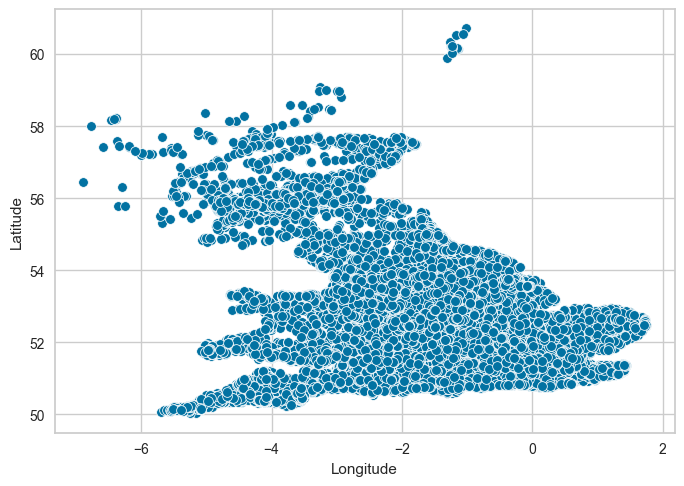

In [48]:
import seaborn as sns 
# based on Longitude and Latitude
sns.scatterplot(x= 'Longitude', y='Latitude', data= df)

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [41]:
%pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? 


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\rahaf\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


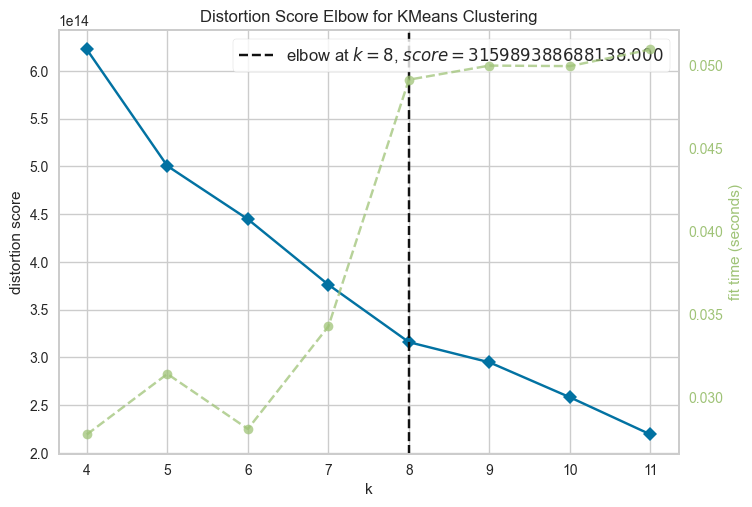

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [110]:
# Find the `n_clusters` parameter using the elbow method

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model= KMeans()

visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(x_pca)  
visualizer.show()

In [128]:
# Train the model
from sklearn.cluster import KMeans


# based on elbow method number of clusters better to be 8

kmeans = KMeans(n_clusters=7, random_state= 0)
kmeans.fit(x_pca)


kmeans.cluster_centers_

array([[  50320.64247673,  -54339.03770331],
       [-122086.44079823,   92957.83804233],
       [-415162.79946161, -289342.192833  ],
       [ 476750.72307302, -122468.59619756],
       [-232936.17501866, -107139.77334586],
       [ 237159.7346194 ,   22869.66399982],
       [  51872.0249289 ,  159811.44274074]])

In [129]:
pred= kmeans.predict(x_pca)

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [131]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,pred )
acc

ValueError: Found input variables with inconsistent numbers of samples: [41566, 52000]

## Plot the data points with their predicted cluster center

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?